In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score
from collections import Counter

In [40]:
df=pd.read_csv("D:/Insurance_AI_project/datasets/fraud_detection_dataset.csv")

In [41]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Claim_Type,Suspicious_Flags,Fraud_Label,Annual_Income,Policy_Issue_Date
0,CLM100000,17-10-2023,CUST1000,8739.29,Auto,1,0,67450.71230,27-06-2023
1,CLM100001,25-04-2022,CUST1001,6853.10,Life,0,0,57926.03548,04-02-2021
2,CLM100002,26-01-2022,CUST1002,3090.97,Auto,0,0,69715.32807,09-09-2019
3,CLM100003,09-10-2022,CUST1003,32384.41,Home,0,0,82845.44785,02-01-2022
4,CLM100004,08-09-2022,CUST1004,8129.38,Life,0,0,56487.69938,15-05-2022


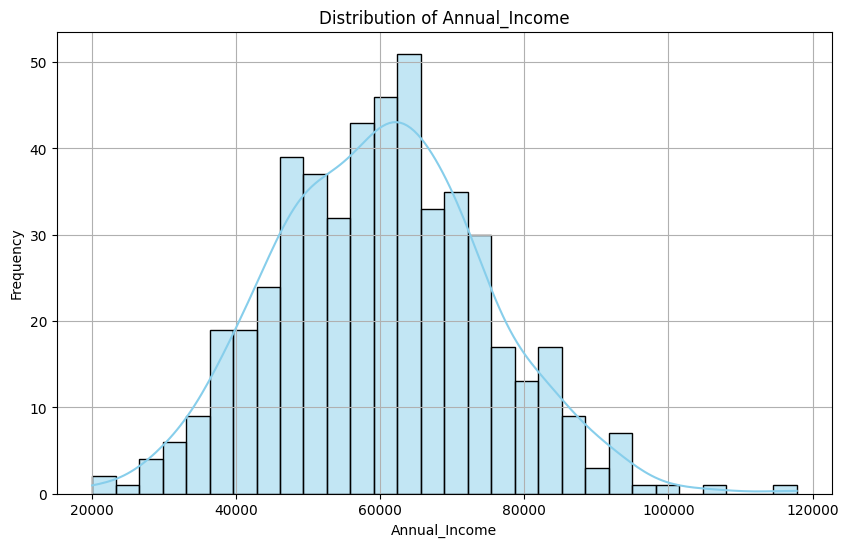

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Income'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Annual_Income')
plt.xlabel('Annual_Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\Users\naveen\AppData\Local\Temp\ipykernel_11908\2631647983.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Claim_Type', palette='pastel')


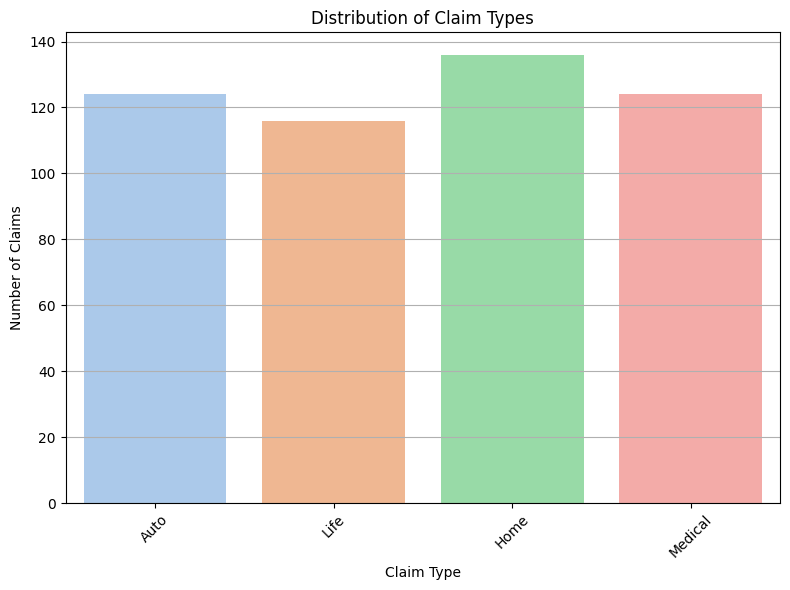

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Claim_Type', palette='pastel')

plt.title("Distribution of Claim Types")
plt.xlabel("Claim Type")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\naveen\AppData\Local\Temp\ipykernel_11908\4172041536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Claim_Type', y='Claim_Amount', data=df, palette='Set2')


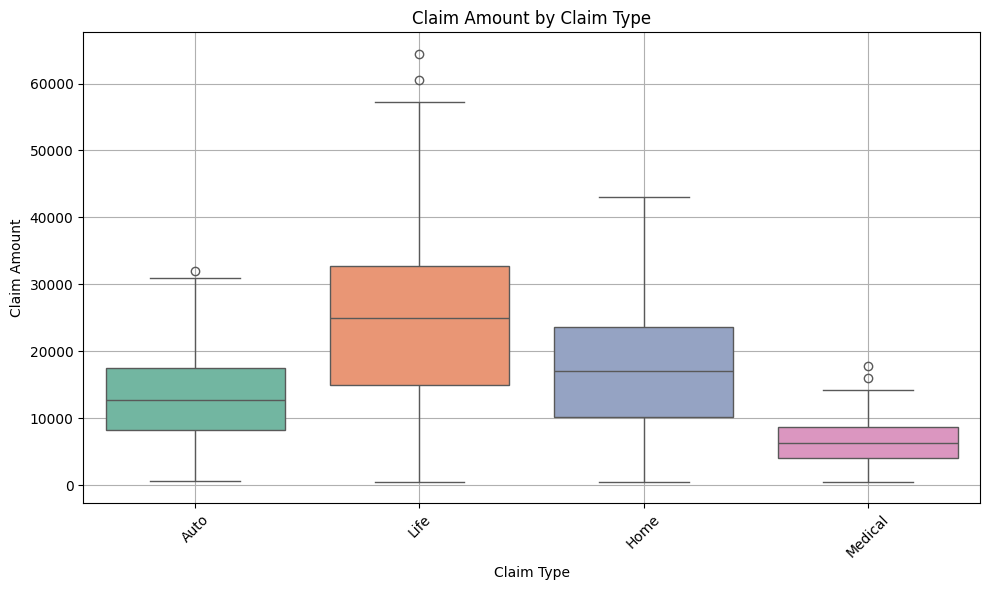

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Claim_Type', y='Claim_Amount', data=df, palette='Set2')

plt.title("Claim Amount by Claim Type")
plt.ylabel("Claim Amount")
plt.xlabel("Claim Type")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\naveen\AppData\Local\Temp\ipykernel_11908\3874973473.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Claim_Type', y='Claim_Amount', data=avg_claims, palette='pastel')


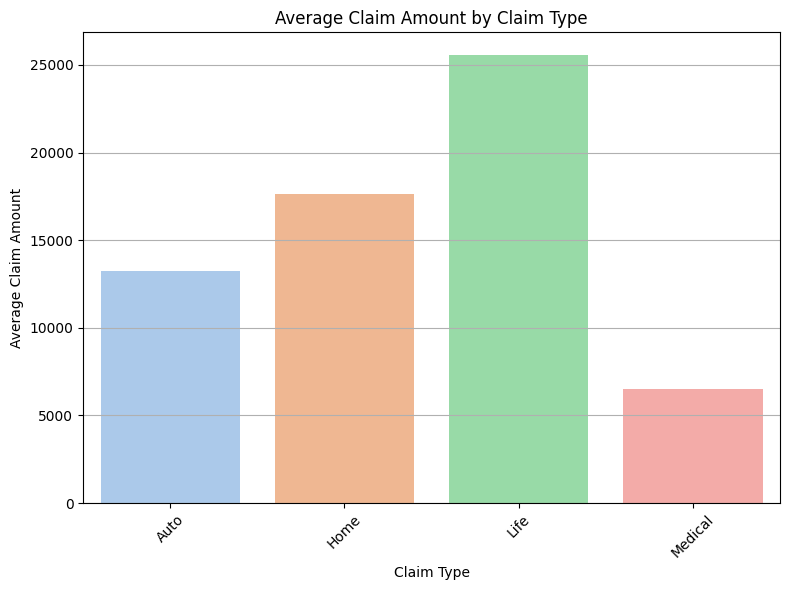

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Claim_Type and calculate mean
avg_claims = df.groupby('Claim_Type')['Claim_Amount'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Claim_Type', y='Claim_Amount', data=avg_claims, palette='pastel')

plt.title("Average Claim Amount by Claim Type")
plt.ylabel("Average Claim Amount")
plt.xlabel("Claim Type")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [12]:
# Claim-to-Income Ratio
df['Claim_to_Income_Ratio'] = df['Claim_Amount'] / df['Annual_Income']


In [13]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Claim_Type,Suspicious_Flags,Fraud_Label,Annual_Income,Policy_Issue_Date,Claim_to_Income_Ratio
0,CLM100000,2023-10-17,CUST1000,8739.29,Auto,1,0,67450.712295,2023-06-27,0.129566
1,CLM100001,2022-04-25,CUST1001,6853.10,Life,0,0,57926.035482,2021-02-04,0.118308
2,CLM100002,2022-01-26,CUST1002,3090.97,Auto,0,0,69715.328072,2019-09-09,0.044337
3,CLM100003,2022-10-09,CUST1003,32384.41,Home,0,0,82845.447846,2022-01-02,0.390902
4,CLM100004,2022-09-08,CUST1004,8129.38,Life,0,0,56487.699379,2022-05-15,0.143914


In [14]:
# Convert dates to datetime
df['Claim_Date'] = pd.to_datetime(df['Claim_Date'])
df['Policy_Issue_Date'] = pd.to_datetime(df['Policy_Issue_Date'])


In [15]:
# Flag claims made within 30 days of policy issuance
df['Claim_Within_Short_Period'] = (df['Claim_Date'] - df['Policy_Issue_Date']).dt.days <= 30

In [16]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Claim_Type,Suspicious_Flags,Fraud_Label,Annual_Income,Policy_Issue_Date,Claim_to_Income_Ratio,Claim_Within_Short_Period
0,CLM100000,2023-10-17,CUST1000,8739.29,Auto,1,0,67450.712295,2023-06-27,0.129566,False
1,CLM100001,2022-04-25,CUST1001,6853.10,Life,0,0,57926.035482,2021-02-04,0.118308,False
2,CLM100002,2022-01-26,CUST1002,3090.97,Auto,0,0,69715.328072,2019-09-09,0.044337,False
3,CLM100003,2022-10-09,CUST1003,32384.41,Home,0,0,82845.447846,2022-01-02,0.390902,False
4,CLM100004,2022-09-08,CUST1004,8129.38,Life,0,0,56487.699379,2022-05-15,0.143914,False


In [17]:
df = pd.get_dummies(df, columns=['Claim_Type'], drop_first=False)


In [18]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Annual_Income,Policy_Issue_Date,Claim_to_Income_Ratio,Claim_Within_Short_Period,Claim_Type_Auto,Claim_Type_Home,Claim_Type_Life,Claim_Type_Medical
0,CLM100000,2023-10-17,CUST1000,8739.29,1,0,67450.712295,2023-06-27,0.129566,False,True,False,False,False
1,CLM100001,2022-04-25,CUST1001,6853.10,0,0,57926.035482,2021-02-04,0.118308,False,False,False,True,False
2,CLM100002,2022-01-26,CUST1002,3090.97,0,0,69715.328072,2019-09-09,0.044337,False,True,False,False,False
3,CLM100003,2022-10-09,CUST1003,32384.41,0,0,82845.447846,2022-01-02,0.390902,False,False,True,False,False
4,CLM100004,2022-09-08,CUST1004,8129.38,0,0,56487.699379,2022-05-15,0.143914,False,False,False,True,False


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Claim_Amount', 'Annual_Income']] = scaler.fit_transform(df[['Claim_Amount', 'Annual_Income']])


In [20]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Annual_Income,Policy_Issue_Date,Claim_to_Income_Ratio,Claim_Within_Short_Period,Claim_Type_Auto,Claim_Type_Home,Claim_Type_Life,Claim_Type_Medical
0,CLM100000,2023-10-17,CUST1000,-0.605613,1,0,0.500338,2023-06-27,0.129566,False,True,False,False,False
1,CLM100001,2022-04-25,CUST1001,-0.771603,0,0,-0.149726,2021-02-04,0.118308,False,False,False,True,False
2,CLM100002,2022-01-26,CUST1002,-1.102682,0,0,0.654899,2019-09-09,0.044337,False,True,False,False,False
3,CLM100003,2022-10-09,CUST1003,1.475232,0,0,1.551037,2022-01-02,0.390902,False,False,True,False,False
4,CLM100004,2022-09-08,CUST1004,-0.659287,0,0,-0.247893,2022-05-15,0.143914,False,False,False,True,False


In [22]:
# Save the scaler to a pickle file
import pickle 
with open('fraud_new_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:


# Step 1: Select relevant numerical features
features = df[['Claim_Amount', 'Annual_Income']]

# Step 2: Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_IsolationForest'] = iso.fit_predict(features)
df['Anomaly_IsolationForest'] = df['Anomaly_IsolationForest'].apply(lambda x: 1 if x == -1 else 0)

# Step 3: Elliptic Envelope
ee = EllipticEnvelope(contamination=0.05, random_state=42)
df['Anomaly_EllipticEnvelope'] = ee.fit_predict(features)
df['Anomaly_EllipticEnvelope'] = df['Anomaly_EllipticEnvelope'].apply(lambda x: 1 if x == -1 else 0)

# Step 4: Local Outlier Factor (note: LOF only has fit_predict, no transform)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['Anomaly_LOF'] = lof.fit_predict(features)
df['Anomaly_LOF'] = df['Anomaly_LOF'].apply(lambda x: 1 if x == -1 else 0)

# Step 5: Combine all anomalies into one flag
df['Is_Anomalous'] = (
    df['Anomaly_IsolationForest'] |
    df['Anomaly_EllipticEnvelope'] |
    df['Anomaly_LOF']
)

# Optional: Update Suspicious_Flags if needed
df['Suspicious_Flags'] = (
    df['Suspicious_Flags'] | df['Is_Anomalous']
).astype(int)


In [24]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Annual_Income,Policy_Issue_Date,Claim_to_Income_Ratio,Claim_Within_Short_Period,Claim_Type_Auto,Claim_Type_Home,Claim_Type_Life,Claim_Type_Medical,Anomaly_IsolationForest,Anomaly_EllipticEnvelope,Anomaly_LOF,Is_Anomalous
0,CLM100000,2023-10-17,CUST1000,-0.605613,1,0,0.500338,2023-06-27,0.129566,False,True,False,False,False,0,0,0,0
1,CLM100001,2022-04-25,CUST1001,-0.771603,0,0,-0.149726,2021-02-04,0.118308,False,False,False,True,False,0,0,0,0
2,CLM100002,2022-01-26,CUST1002,-1.102682,0,0,0.654899,2019-09-09,0.044337,False,True,False,False,False,0,0,0,0
3,CLM100003,2022-10-09,CUST1003,1.475232,0,0,1.551037,2022-01-02,0.390902,False,False,True,False,False,0,0,0,0
4,CLM100004,2022-09-08,CUST1004,-0.659287,0,0,-0.247893,2022-05-15,0.143914,False,False,False,True,False,0,0,0,0


In [29]:
# 🎯 Define target
y = df['Fraud_Label']

# 🧹 Define features — drop irrelevant columns
X = df.drop([
    'Claim_ID', 'Customer_ID', 'Claim_Date', 'Policy_Issue_Date',
    'Fraud_Label', 'Anomaly_IsolationForest', 'Anomaly_EllipticEnvelope', 'Anomaly_LOF'
], axis=1)

In [32]:
# ✂️ Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🧪 Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ⚠️ Don't scale again — features already scaled!
X_train_scaled = X_train_resampled.values
X_test_scaled = X_test.values

# 🌳 Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_resampled)

# 🧠 Train Neural Network
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
nn.fit(X_train_scaled, y_train_resampled)

# 🔍 Predict probabilities
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]
nn_probs = nn.predict_proba(X_test_scaled)[:, 1]

# 🧮 Ensemble fraud score
fraud_scores = (rf_probs + nn_probs) / 2

# 📌 Add fraud score and label to test set
X_test = X_test.copy()
X_test['Fraud_Score'] = fraud_scores
X_test['True_Label'] = y_test.values

# 🧾 Evaluation
pred_labels = (fraud_scores > 0.5).astype(int)
print("ROC AUC Score:", roc_auc_score(y_test, fraud_scores))
print(classification_report(y_test, pred_labels))

ROC AUC Score: 0.9897959183673469
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.50      1.00      0.67         2

    accuracy                           0.98       100
   macro avg       0.75      0.99      0.83       100
weighted avg       0.99      0.98      0.98       100



d:\Insurance_AI_project\myenvv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
# Save Random Forest model
with open("new_random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save Neural Network model
with open("new_neural_network_model.pkl", "wb") as f:
    pickle.dump(nn, f)


In [34]:
print(X.columns.tolist())


['Claim_Amount', 'Suspicious_Flags', 'Annual_Income', 'Claim_to_Income_Ratio', 'Claim_Within_Short_Period', 'Claim_Type_Auto', 'Claim_Type_Home', 'Claim_Type_Life', 'Claim_Type_Medical', 'Is_Anomalous']


In [35]:
# Assuming your final DataFrame is named X_test and includes predictions
X_test.to_csv("fraud_detection_report.csv", index=False)


In [ ]:
# Load Scaler
with open("D:/Insurance_AI_project/scriptfiles/fraud_new_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)